In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the training data
train_path = "train_data.txt"
df = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [3]:
df=df[0:54200]

In [4]:
df.describe()

,Title,Genre,Description
count,54200,54200,54200
unique,54200,27,54072
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13611,12


In [5]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [6]:
# Load the test data
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


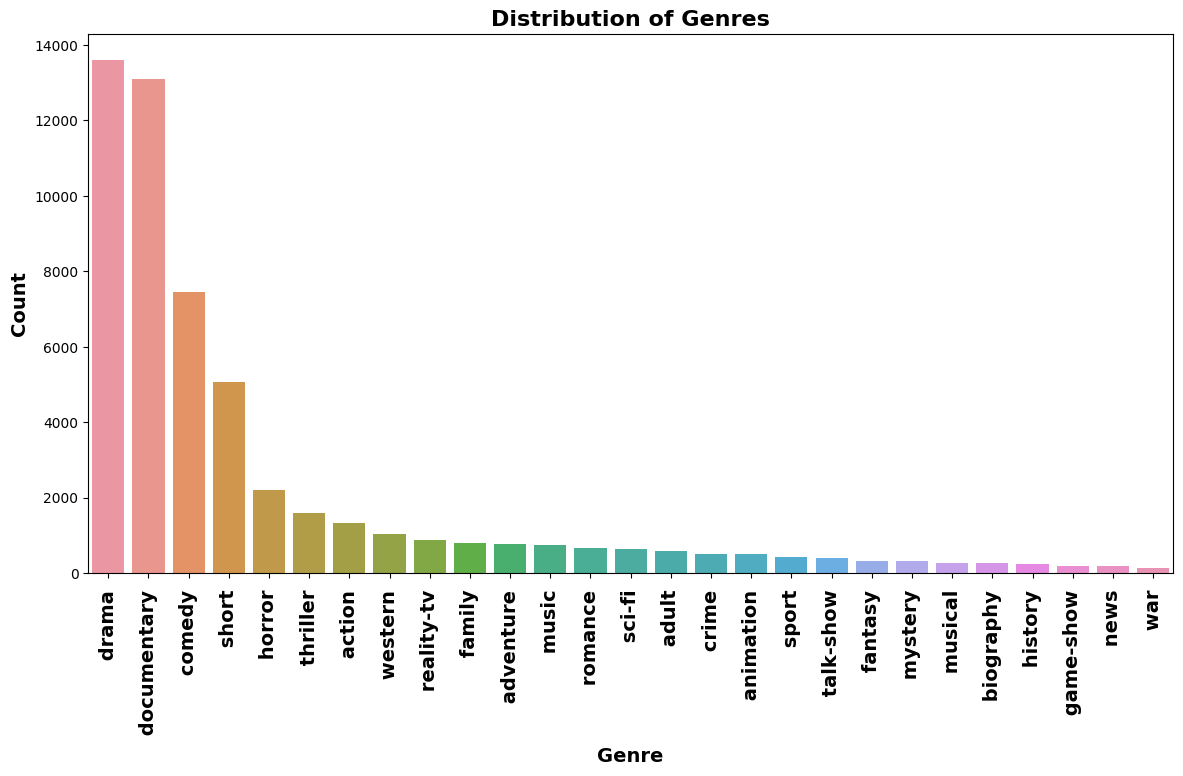

In [7]:
plt.figure(figsize=(14, 7))
counts = df['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_desc'] = df['Description'].apply(preprocess_text)


In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_desc']).toarray()
X_test= vectorizer.fit_transform(df['processed_desc']).toarray()
y = df['Genre']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred,zero_division=0))

Validation Accuracy: 0.5173431734317343
               precision    recall  f1-score   support

      action        0.56      0.08      0.13       249
       adult        0.75      0.06      0.10       108
   adventure        0.27      0.03      0.05       139
   animation        0.00      0.00      0.00        99
   biography        0.00      0.00      0.00        56
      comedy        0.50      0.40      0.45      1501
       crime        0.00      0.00      0.00       118
 documentary        0.57      0.87      0.69      2618
       drama        0.46      0.83      0.59      2746
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        66
   game-show        1.00      0.19      0.33        36
     history        0.00      0.00      0.00        50
      horror        0.74      0.33      0.46       433
       music        0.78      0.14      0.24       129
     musical        0.00      0.00      0.00        53
     mystery        0.00

In [12]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [13]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [14]:
test_data.tail()

,Id,Title,Description
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


In [15]:
# Use the trained model to make predictions on the test data
X_test_predictions = model.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [16]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...          drama   
2       One year in the life of Albin and his family ...          drama   
3       His father has died, he hasn't spoken with hi...          drama   
4       Before he was kn

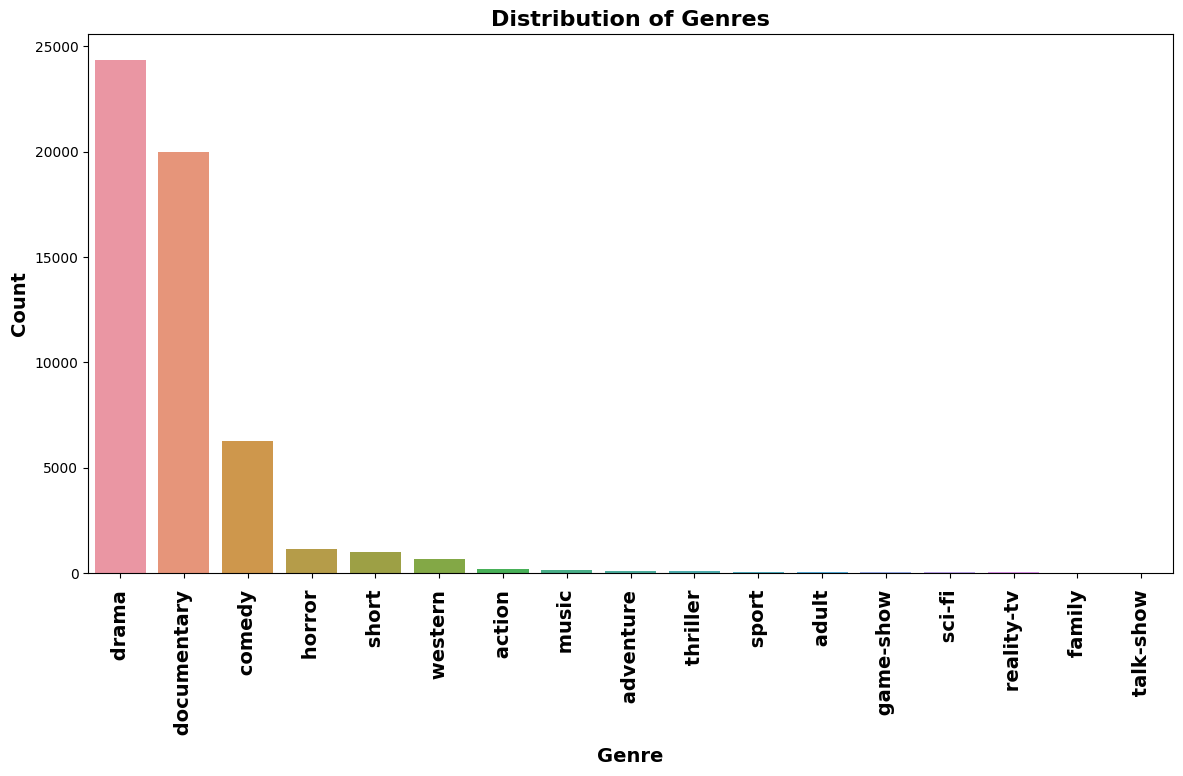

In [17]:
plt.figure(figsize=(14, 7))
counts = test_data['Predicted_Genre'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()